In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


# Full File Import
# df = pd.read_csv('./terrorism_new.csv',dtype={"approxdate": str})
# df.head()

# Truncated File Import
df = pd.read_csv('./truncated_terrorism_new.csv')
df.head()


# To export to a smaller CSV for Github Repo
# exportDf = df[['eventid','country_txt', 'targtype1','targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'region_txt','gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']]
# exportDf.to_csv('truncated_terrorism_new.csv')

/Users/vincent/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,eventid,country_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,region_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3
0,0,197000000001,Dominican Republic,14,Private Citizens & Property,68.0,Named Civilian,Central America & Caribbean,MANO-D,NaN,NaN,NaN,NaN,NaN
1,1,197000000002,Mexico,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",North America,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN
2,2,197001000001,Philippines,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Southeast Asia,Unknown,NaN,NaN,NaN,NaN,NaN
3,3,197001000002,Greece,7,Government (Diplomatic),46.0,Embassy/Consulate,Western Europe,Unknown,NaN,NaN,NaN,NaN,NaN
4,4,197001000003,Japan,7,Government (Diplomatic),46.0,Embassy/Consulate,East Asia,Unknown,NaN,NaN,NaN,NaN,NaN


In [2]:
# ===================== Identifying which COUNTRIES have the highest terrorism incidents ===================== 

sortedCountries = df.groupby('country_txt').count()
sortedCountries = sortedCountries[['eventid']] 
sortedCountries.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedCountries.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY COUNTRY')
sortedCountries


TERRORISM INCIDENTS BY COUNTRY


,incident_count
country_txt,
Iraq,26057
Pakistan,14847
Afghanistan,14509
India,12853
Colombia,8515
Philippines,7509
Peru,6108
United Kingdom,5335
El Salvador,5320


In [3]:
# ===================== Identifying which REGIONS have the highest terrorism incidents ===================== 

sortedRegions = df.groupby('region_txt').count()
sortedRegions = sortedRegions[['eventid']] 
sortedRegions.rename(columns={'eventid' : 'incident_count'}, inplace=True)
sortedRegions.sort_values('incident_count', ascending = False, inplace = True)
print('')
print('TERRORISM INCIDENTS BY REGION')
sortedRegions



TERRORISM INCIDENTS BY REGION


,incident_count
region_txt,
Middle East & North Africa,53110
South Asia,48266
Sub-Saharan Africa,19752
South America,19292
Western Europe,16843
Southeast Asia,13363
Central America & Caribbean,10359
Eastern Europe,5217
North America,3579


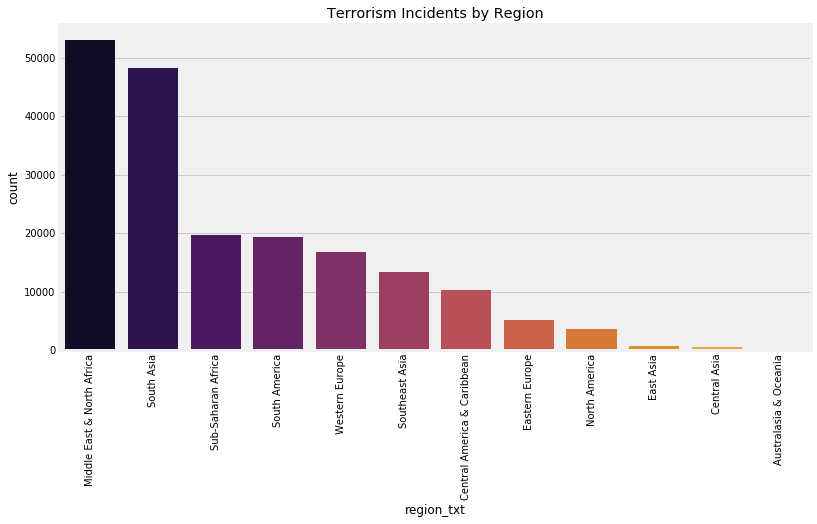

In [4]:
# GRAPH: Identifying which REGIONS have the highest terrorism incidents

plt.subplots(figsize=(12,6))
sns.countplot('region_txt', data=df, palette ='inferno', order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Incidents by Region')
plt.show()

In [5]:
# ===================== Incident Targets - ALL terrorist groups and ALL world regions ===================== 

target = df.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - WHOLE WORLD')
target


TERRORISM TARGETS - WHOLE WORLD


,incident_count
targtype1_txt,
Private Citizens & Property,46283
Military,29978
Police,26023
Government (General),22274
Business,21277
Transportation,6929
Unknown,6449
Utilities,6158
Religious Figures/Institutions,4693


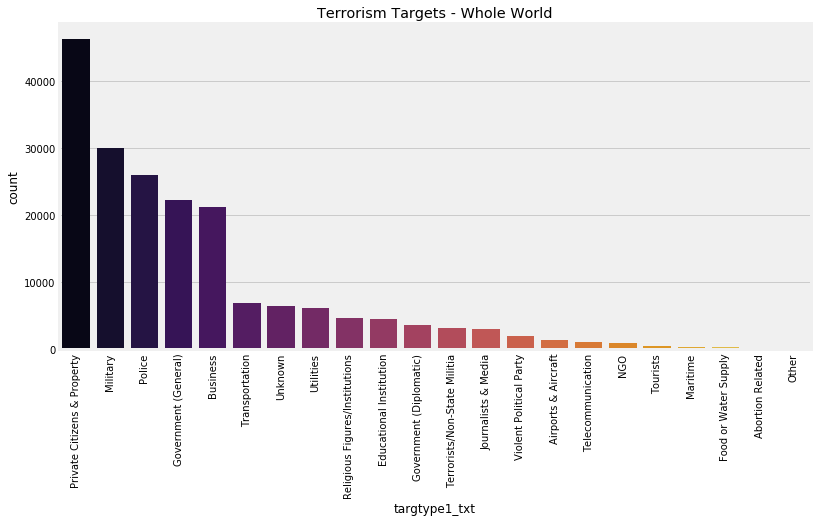

In [6]:
# GRAPH: Incident Targets - ALL terrorist groups and ALL world regions

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=df, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - Whole World')
plt.show()

In [7]:
# ===================== Incident Targets - Middle East & North Africa, all Terrorist Groups ===================== 

regionString = 'Middle East & North Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Middle East & North Africa


,incident_count
targtype1_txt,
Private Citizens & Property,16182
Military,9866
Police,7128
Government (General),4411
Business,4323
Unknown,2353
Terrorists/Non-State Militia,1777
Religious Figures/Institutions,1316
Transportation,1212


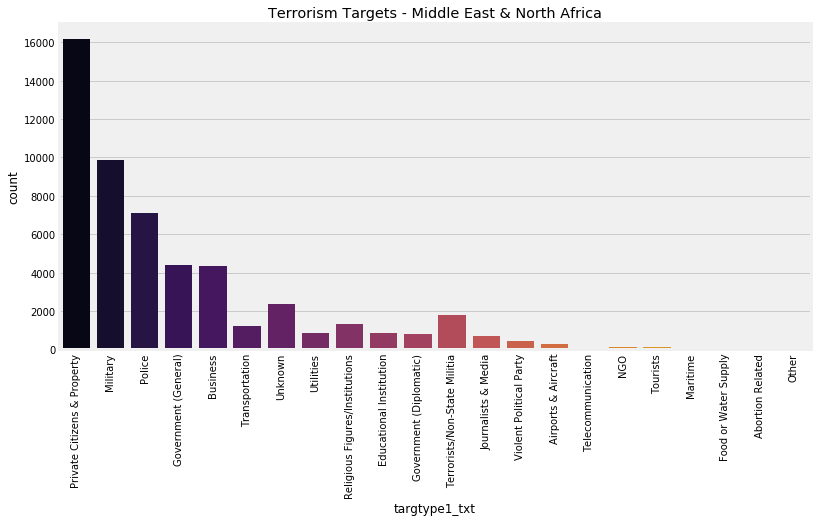

In [8]:
# GRAPH: Incident Targets - Middle East & North Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [9]:
# ===================== Incident Targets - South Asia, all Terrorist Groups ===================== 

regionString = 'South Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South Asia


,incident_count
targtype1_txt,
Private Citizens & Property,11099
Police,9412
Military,6289
Government (General),5809
Business,3297
Unknown,2645
Transportation,2162
Educational Institution,1852
Religious Figures/Institutions,1191


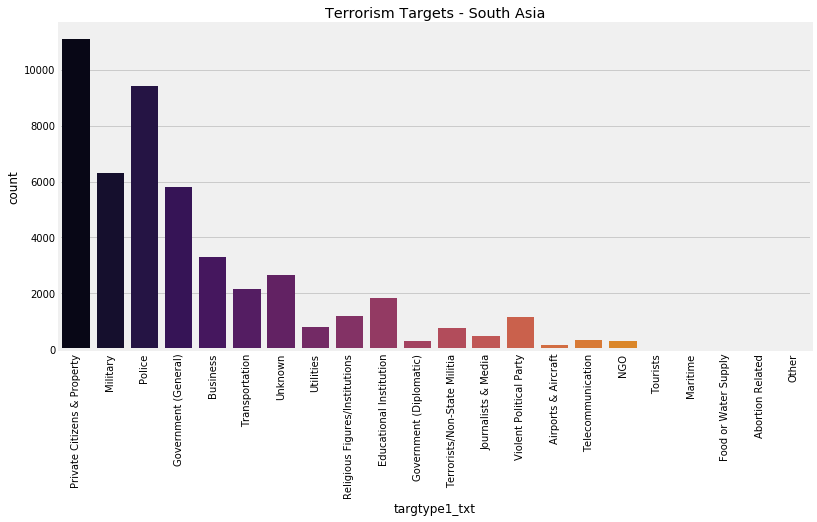

In [10]:
# GRAPH: Incident Targets - South Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [11]:
# ===================== Incident Targets - Sub-Saharan Africa, all Terrorist Groups ===================== 

regionString = 'Sub-Saharan Africa'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Sub-Saharan Africa


,incident_count
targtype1_txt,
Private Citizens & Property,6584
Military,3552
Government (General),2304
Police,1651
Business,1325
Government (Diplomatic),705
Transportation,600
Religious Figures/Institutions,599
Utilities,476


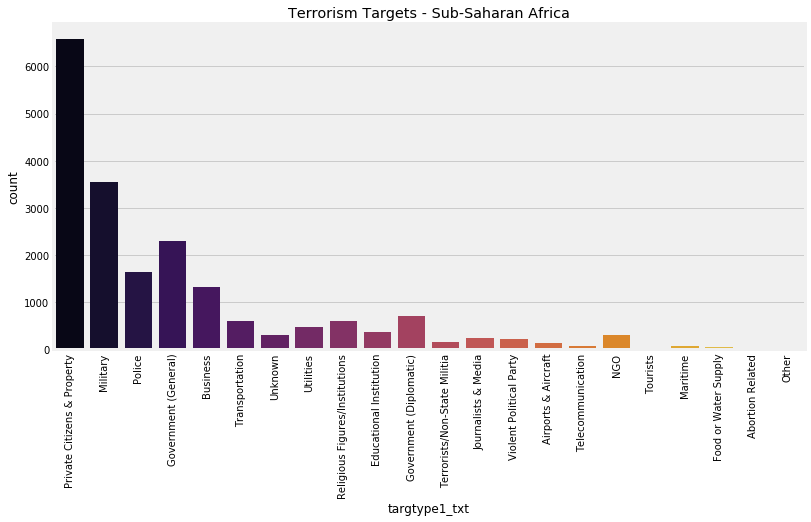

In [12]:
# GRAPH: Incident Targets - Sub-Saharan Africa, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [13]:
# ===================== Incident Targets - South America, all Terrorist Groups ===================== 

regionString = 'South America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - South America


,incident_count
targtype1_txt,
Business,3531
Private Citizens & Property,3222
Government (General),2874
Police,2294
Utilities,1963
Military,1823
Transportation,1099
Journalists & Media,588
Government (Diplomatic),391


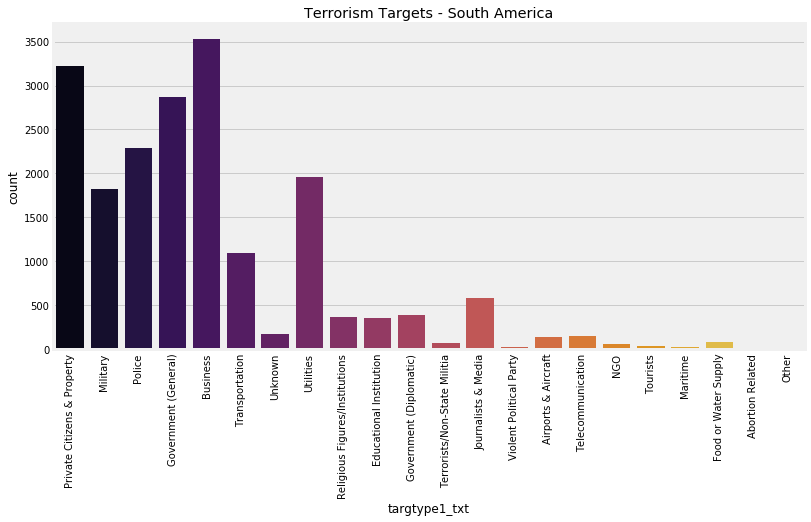

In [14]:
# GRAPH: Incident Targets - South America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [15]:
# ===================== Incident Targets - Western Europe, all Terrorist Groups ===================== 

regionString = 'Western Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Western Europe


,incident_count
targtype1_txt,
Business,4231
Private Citizens & Property,3439
Government (General),2171
Police,2161
Military,1384
Government (Diplomatic),681
Transportation,454
Unknown,386
Religious Figures/Institutions,333


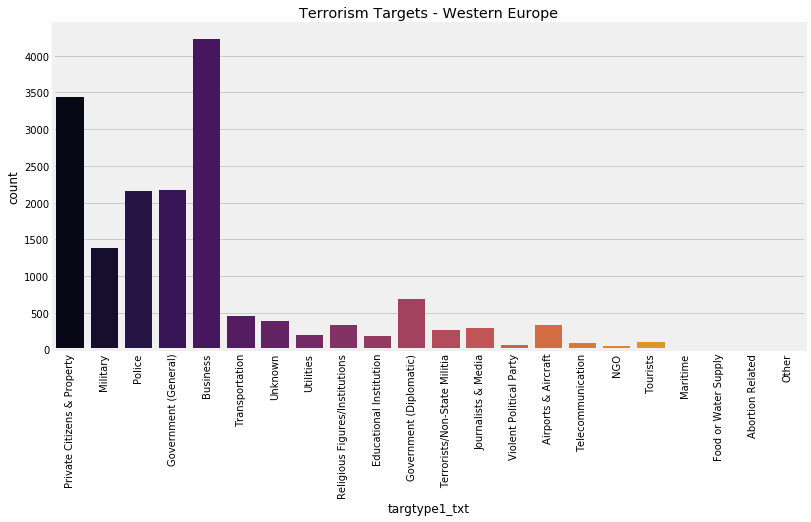

In [16]:
# GRAPH: Incident Targets - Western Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [17]:
# ===================== Incident Targets - Southeast Asia, all Terrorist Groups ===================== 

regionString = 'Southeast Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Southeast Asia


,incident_count
targtype1_txt,
Private Citizens & Property,2650
Military,2501
Government (General),2145
Business,1811
Police,1454
Transportation,470
Educational Institution,421
Utilities,401
Religious Figures/Institutions,357


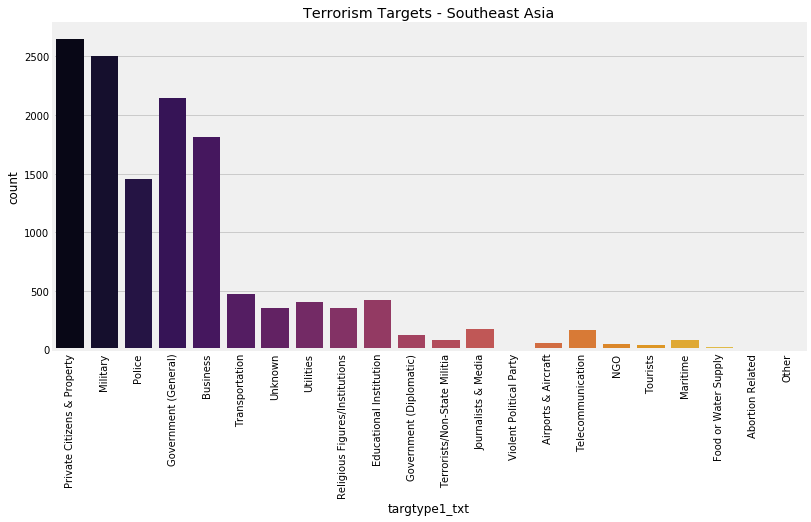

In [18]:
# GRAPH: Incident Targets - Southeast Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [19]:
# ===================== Incident Targets - Central America & Caribbean, all Terrorist Groups ===================== 

regionString = 'Central America & Caribbean'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central America & Caribbean


,incident_count
targtype1_txt,
Military,3065
Private Citizens & Property,1503
Utilities,1227
Business,1193
Government (General),1114
Police,590
Transportation,406
Journalists & Media,274
Government (Diplomatic),220


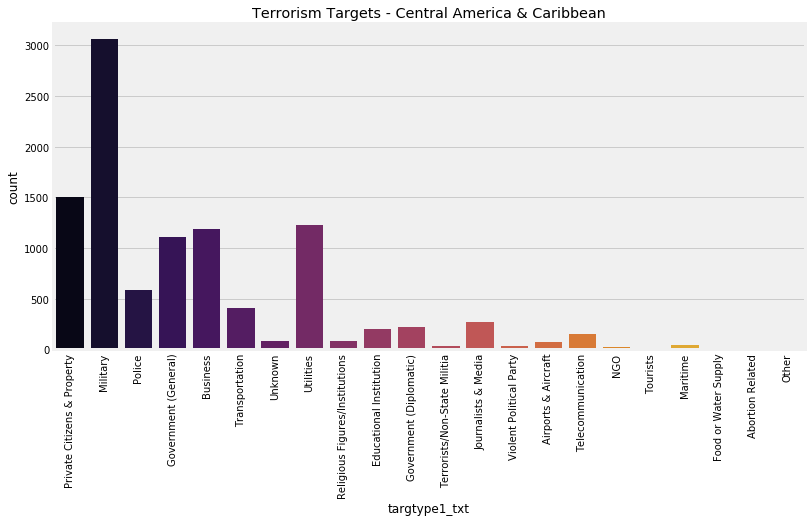

In [20]:
# GRAPH: Incident Targets - Central America & Caribbean, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [21]:
# ===================== Incident Targets - Eastern Europe, all Terrorist Groups ===================== 

regionString = 'Eastern Europe'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Eastern Europe


,incident_count
targtype1_txt,
Military,1139
Private Citizens & Property,888
Police,884
Government (General),704
Business,437
Transportation,295
Religious Figures/Institutions,182
Government (Diplomatic),138
Journalists & Media,138


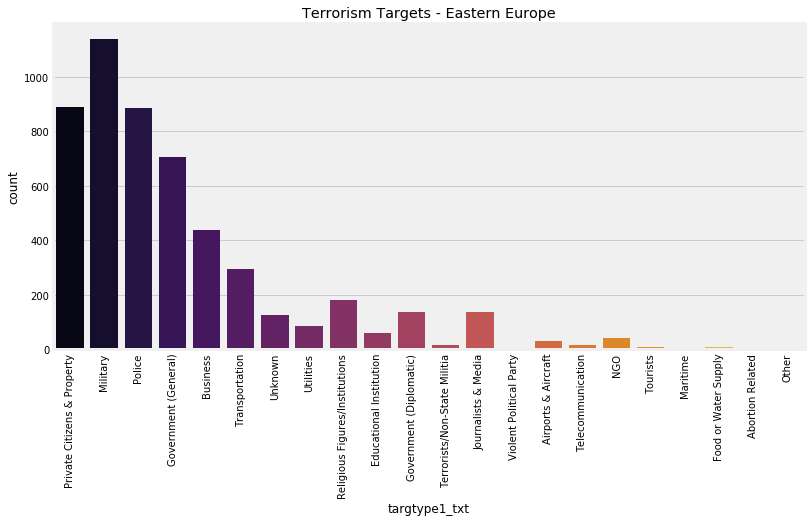

In [22]:
# GRAPH: Incident Targets - Eastern Europe, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [23]:
# ===================== Incident Targets - North America, all Terrorist Groups =====================

regionString = 'North America'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - North America


,incident_count
targtype1_txt,
Business,927
Private Citizens & Property,498
Government (General),433
Abortion Related,260
Police,240
Military,212
Religious Figures/Institutions,192
Educational Institution,184
Government (Diplomatic),184


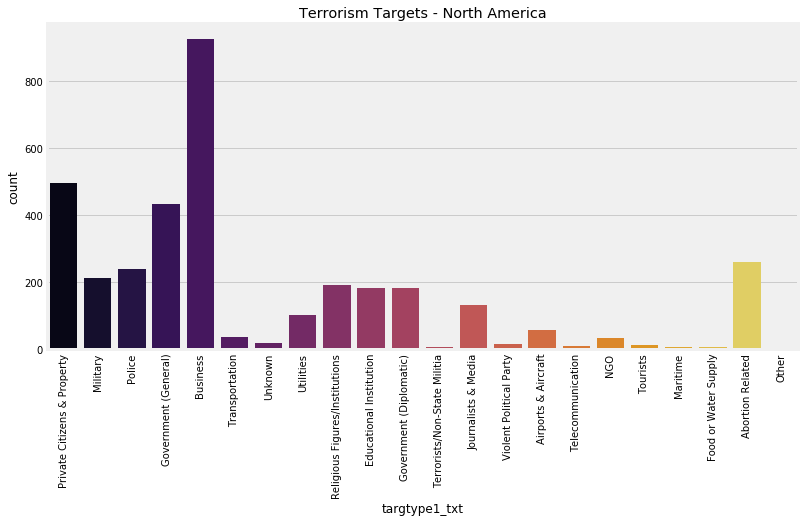

In [24]:
# GRAPH: Incident Targets - North America, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [25]:
# ===================== Incident Targets - East Asia, all Terrorist Groups ====================

regionString = 'East Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - East Asia


,incident_count
targtype1_txt,
Transportation,148
Government (General),129
Business,102
Private Citizens & Property,100
Police,98
Airports & Aircraft,59
Military,41
Government (Diplomatic),35
Religious Figures/Institutions,32


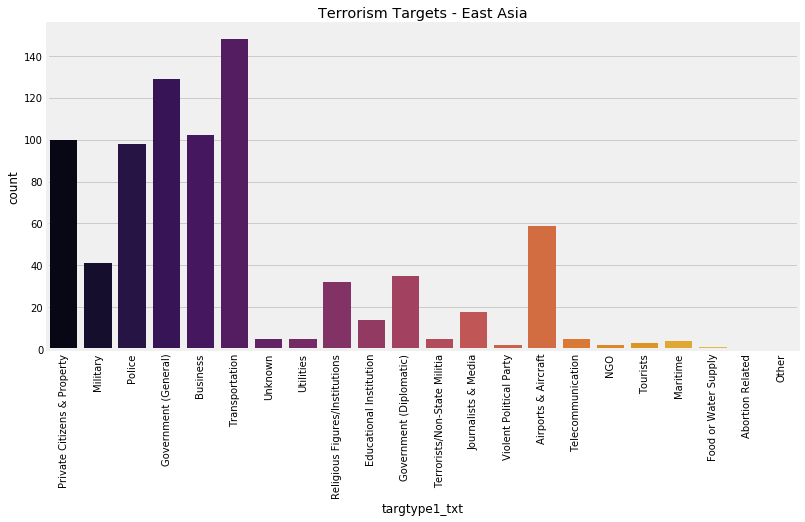

In [26]:
# GRAPH: Incident Targets - East Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [27]:
# ===================== Incident Targets - Central Asia, all Terrorist Groups ====================

regionString = 'Central Asia'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Central Asia


,incident_count
targtype1_txt,
Government (General),128
Military,91
Private Citizens & Property,80
Police,79
Transportation,35
Business,35
Government (Diplomatic),33
Journalists & Media,21
NGO,10


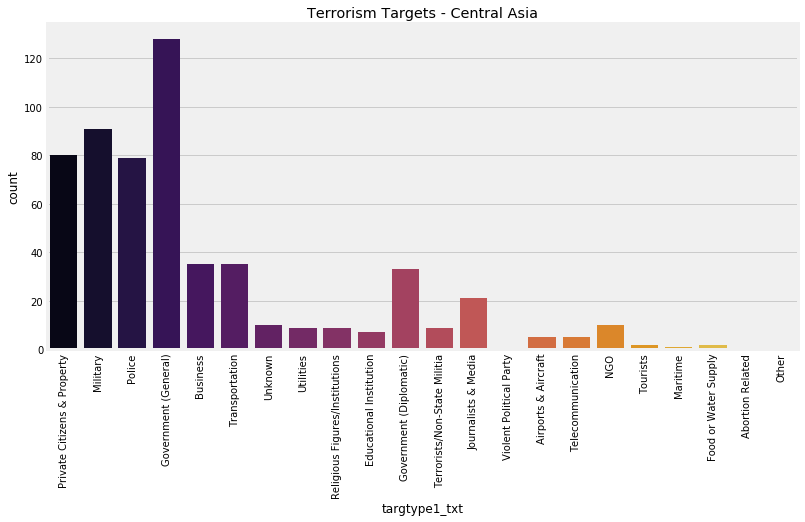

In [28]:
# GRAPH: Incident Targets - Central Asia, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [29]:
# ===================== Incident Targets - Australasia & Oceania, all Terrorist Groups ====================

regionString = 'Australasia & Oceania'

filterBoolean = df['region_txt'] == regionString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - ' + regionString)
target


TERRORISM TARGETS - Australasia & Oceania


,incident_count
targtype1_txt,
Business,65
Government (General),52
Private Citizens & Property,38
Police,32
Government (Diplomatic),30
Religious Figures/Institutions,29
Military,15
Transportation,10
Educational Institution,8


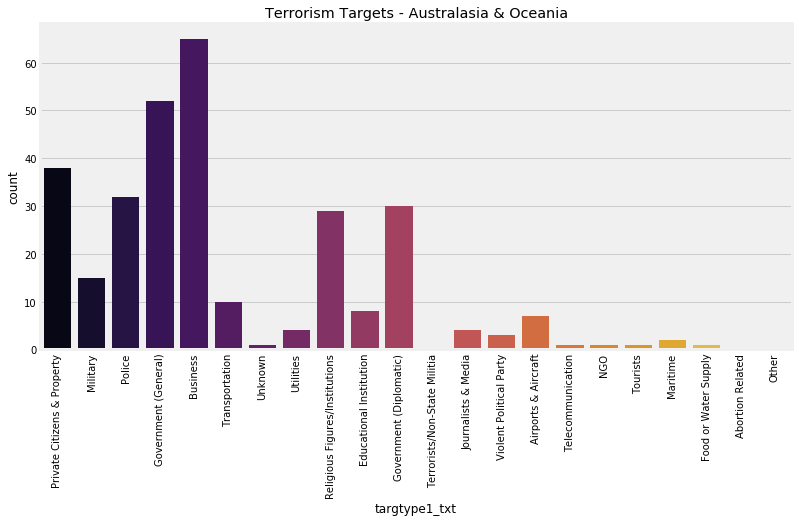

In [30]:
# GRAPH: Incident Targets - Australasia & Oceania, all Terrorist Groups
# Note: Graph x-axis is sorted by "Whole World" Order to see the relative differences of the region to the world

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + regionString)
plt.show()

In [31]:
# ===================== All Labeled Terrorist Groups - Grouped to see their incident counts  ====================

target = df.groupby('gname').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By Terrorist Group')
target


TERRORISM TARGETS - By Terrorist Group


,incident_count
gname,
Unknown,86261
Taliban,8727
Islamic State of Iraq and the Levant (ISIL),6385
Shining Path (SL),4562
Al-Shabaab,3774
Farabundo Marti National Liberation Front (FMLN),3351
New People's Army (NPA),3054
Irish Republican Army (IRA),2669
Boko Haram,2665


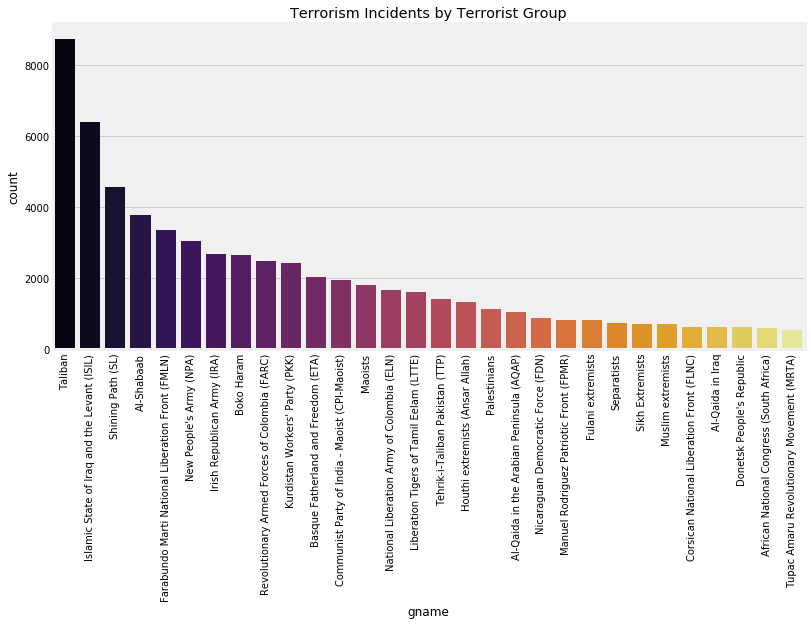

In [36]:
# GRAPH: All Labeled Terrorist Groups - Grouped to see their incident counts
# Includes: Top 30 Terrorist Groups. Not including "Unknown".
# Note: Change iloc values to see more or less groups.

plt.subplots(figsize=(12,6))
sns.countplot('gname', data=df, palette ='inferno', order=df['gname'].value_counts().iloc[1:31].index)
plt.xticks(rotation=90)
plt.title('Terrorism Incidents by Terrorist Group')
plt.show()

In [37]:
# ===================== Incident Targets - For UNKNOWN Terrorist Groups ====================

terroristGroupString = 'Unknown'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Unknown


,incident_count
targtype1_txt,
Private Citizens & Property,21770
Government (General),11849
Police,10833
Military,9462
Business,9383
Unknown,4330
Transportation,3208
Religious Figures/Institutions,2654
Educational Institution,2533


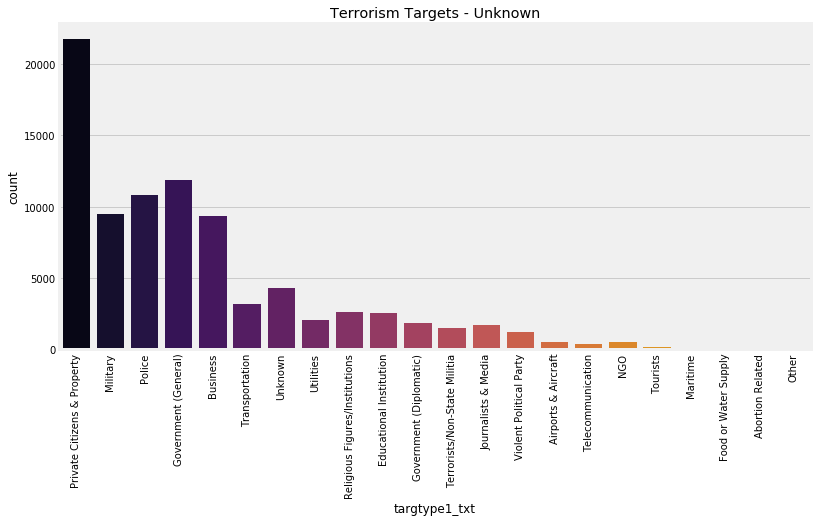

In [40]:
# GRAPH: Incident Targets - For UNKNOWN Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [41]:
# ===================== Incident Targets - For Taliban Terrorist Groups ====================

terroristGroupString = 'Taliban'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Taliban


,incident_count
targtype1_txt,
Police,3024
Military,1759
Private Citizens & Property,1573
Government (General),1043
Unknown,283
Business,251
Educational Institution,157
Terrorists/Non-State Militia,133
Transportation,113


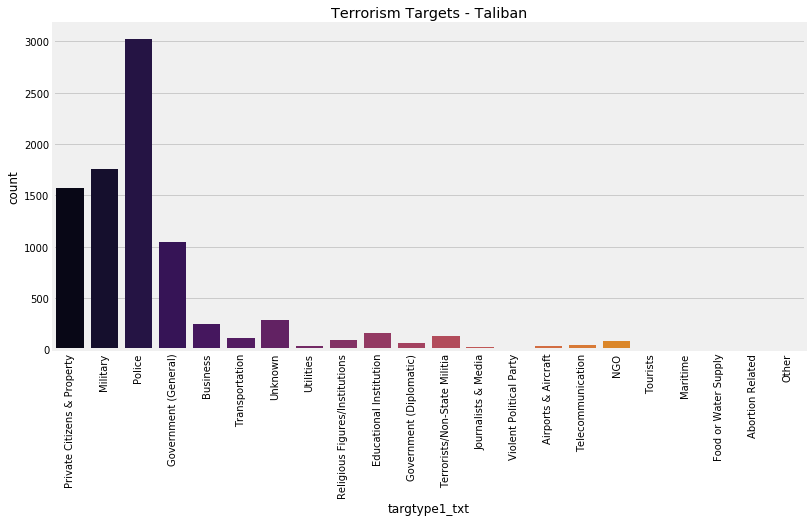

In [42]:
# GRAPH: Incident Targets - For Taliban Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [48]:
# ===================== Incident Targets - For Islamic State of Iraq and the Levant (ISIL) Terrorist Groups ====================

terroristGroupString = 'Islamic State of Iraq and the Levant (ISIL)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Islamic State of Iraq and the Levant (ISIL)


,incident_count
targtype1_txt,
Private Citizens & Property,2533
Military,1657
Police,767
Business,285
Unknown,258
Terrorists/Non-State Militia,257
Government (General),186
Religious Figures/Institutions,128
Utilities,102


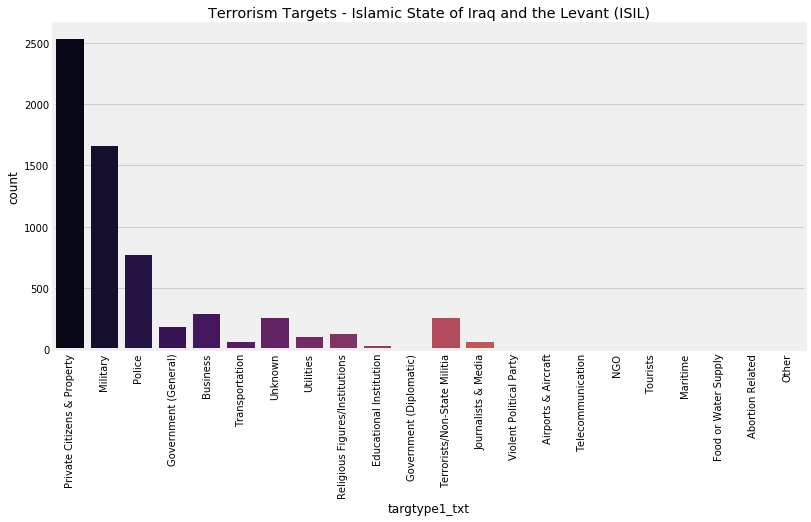

In [49]:
# GRAPH: Incident Targets - For Islamic State of Iraq and the Levant (ISIL) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [50]:
# ===================== Incident Targets - For Shining Path (SL) Terrorist Groups ====================

terroristGroupString = 'Shining Path (SL)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Shining Path (SL)


,incident_count
targtype1_txt,
Private Citizens & Property,858
Business,739
Government (General),728
Police,615
Utilities,567
Military,434
Transportation,201
Educational Institution,111
Journalists & Media,69


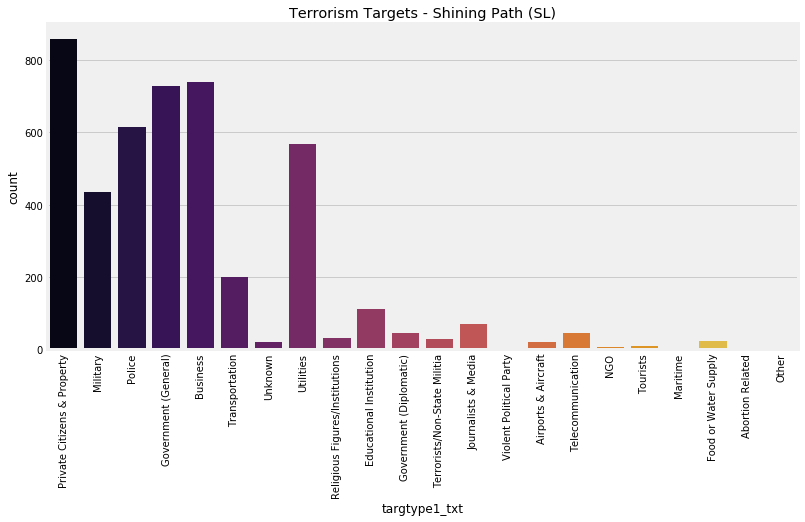

In [51]:
# GRAPH: Incident Targets - For Shining Path (SL) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [52]:
# ===================== Incident Targets - For Al-Shabaab Terrorist Groups ====================

terroristGroupString = 'Al-Shabaab'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Al-Shabaab


,incident_count
targtype1_txt,
Military,1671
Private Citizens & Property,667
Government (General),524
Police,294
Business,186
Unknown,64
Religious Figures/Institutions,51
Journalists & Media,48
NGO,43


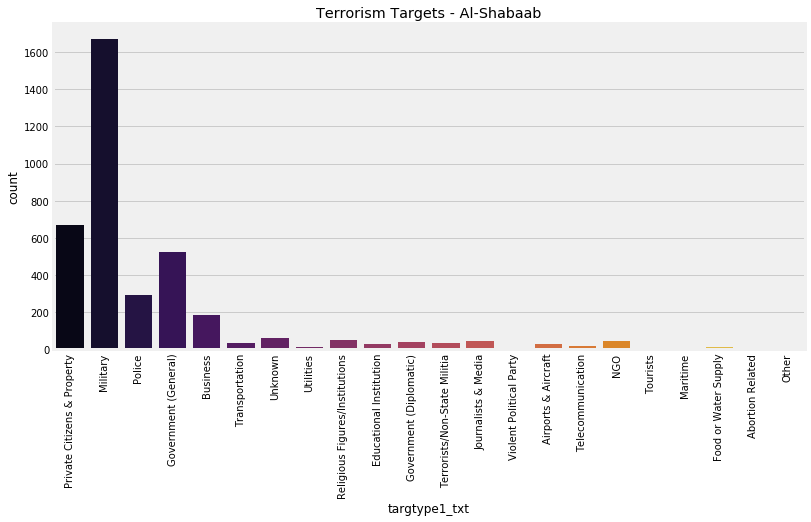

In [53]:
# GRAPH: Incident Targets - For Al-Shabaab Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [56]:
# ===================== Incident Targets - For Farabundo Marti National Liberation Front (FMLN) Terrorist Groups ====================

terroristGroupString = 'Farabundo Marti National Liberation Front (FMLN)'

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Farabundo Marti National Liberation Front (FMLN)


,incident_count
targtype1_txt,
Military,1230
Utilities,923
Private Citizens & Property,367
Business,262
Government (General),149
Transportation,144
Police,123
Journalists & Media,53
Telecommunication,53


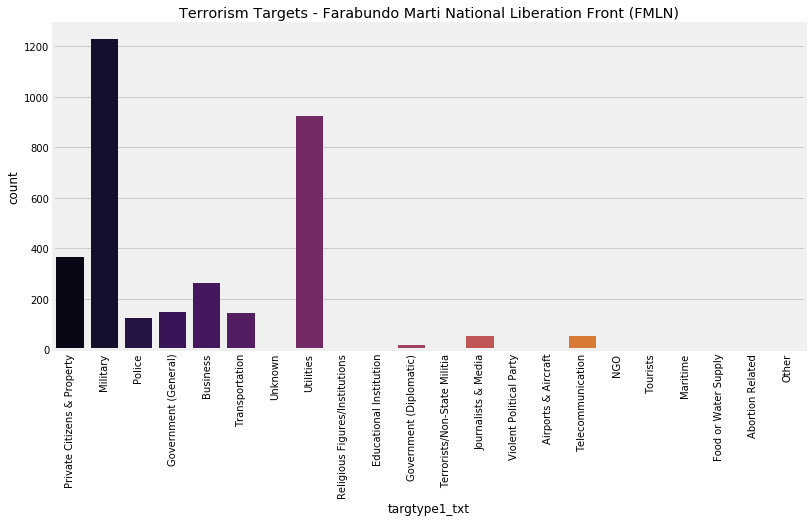

In [57]:
# GRAPH: Incident Targets - For Farabundo Marti National Liberation Front (FMLN) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [58]:
# ===================== Incident Targets - For New People's Army (NPA) Terrorist Groups ====================

terroristGroupString = "New People's Army (NPA)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By New People's Army (NPA)


,incident_count
targtype1_txt,
Military,1103
Business,456
Police,456
Private Citizens & Property,347
Government (General),341
Transportation,68
Utilities,62
Telecommunication,61
Unknown,58


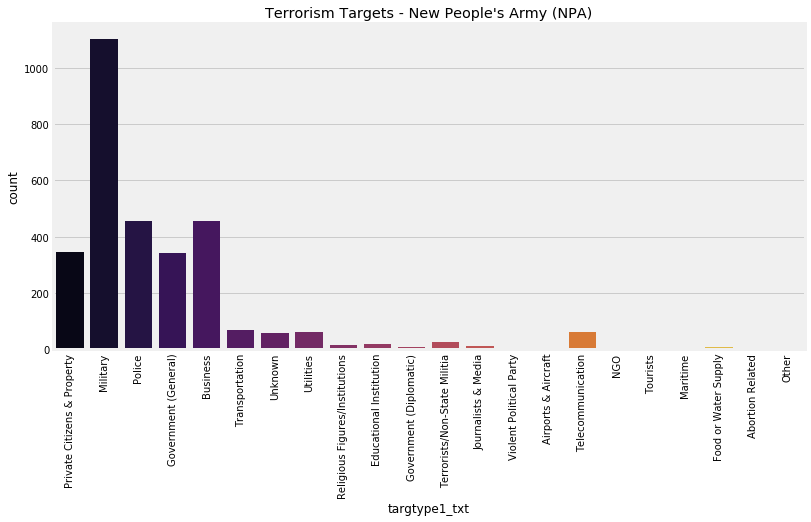

In [59]:
# GRAPH: Incident Targets - For New People's Army (NPA) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [60]:
# ===================== Incident Targets - For Irish Republican Army (IRA) Terrorist Groups ====================

terroristGroupString = "Irish Republican Army (IRA)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Irish Republican Army (IRA)


,incident_count
targtype1_txt,
Military,784
Police,533
Business,531
Private Citizens & Property,423
Government (General),157
Terrorists/Non-State Militia,78
Transportation,76
Unknown,38
Airports & Aircraft,12


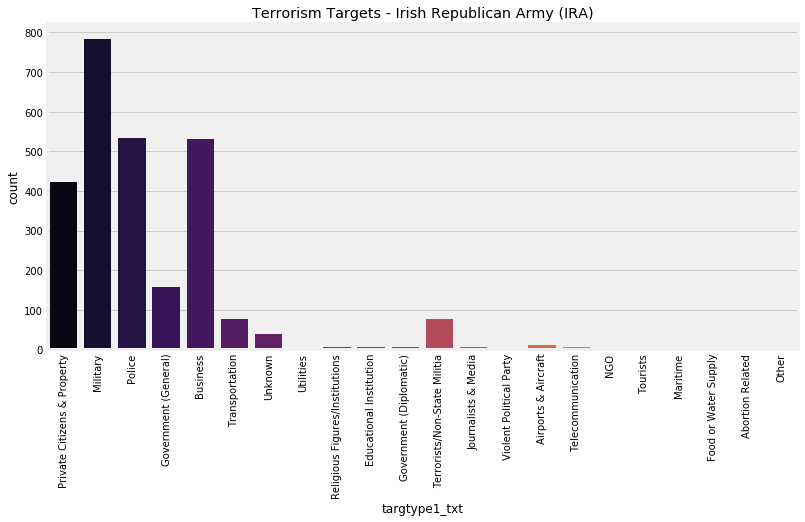

In [61]:
# GRAPH: Incident Targets - For Irish Republican Army (IRA) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [62]:
# ===================== Incident Targets - For Boko Haram Terrorist Groups ====================

terroristGroupString = "Boko Haram"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Boko Haram


,incident_count
targtype1_txt,
Private Citizens & Property,1252
Military,405
Police,251
Religious Figures/Institutions,180
Government (General),144
Business,112
Educational Institution,90
Unknown,88
Transportation,45


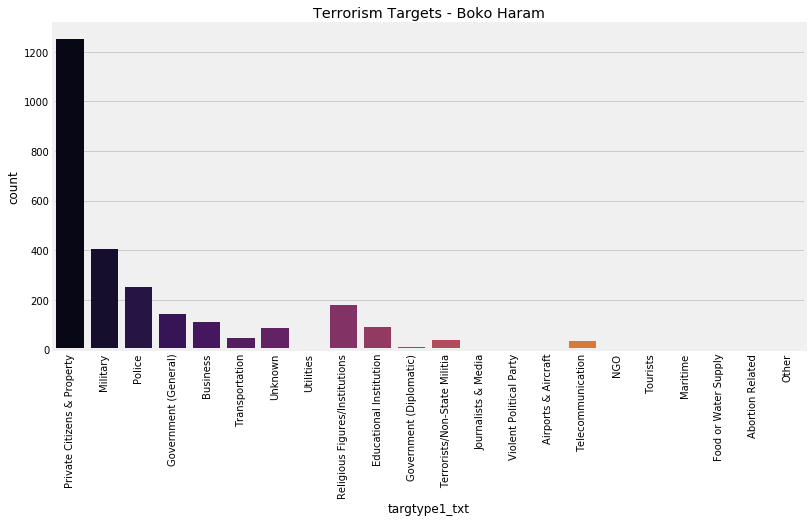

In [63]:
# GRAPH: Incident Targets - For Boko Haram Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [64]:
# ===================== Incident Targets - For Revolutionary Armed Forces of Colombia (FARC) Terrorist Groups ====================

terroristGroupString = "Revolutionary Armed Forces of Colombia (FARC)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Revolutionary Armed Forces of Colombia (FARC)


,incident_count
targtype1_txt,
Private Citizens & Property,505
Military,459
Police,412
Business,333
Utilities,234
Government (General),234
Transportation,152
Unknown,43
Religious Figures/Institutions,19


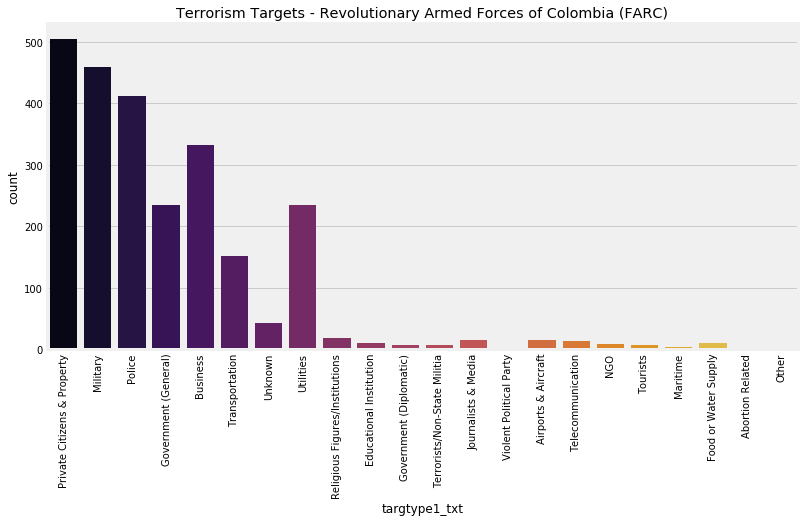

In [65]:
# GRAPH: Incident Targets - For Revolutionary Armed Forces of Colombia (FARC) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()

In [66]:
# ===================== Incident Targets - For Kurdistan Workers' Party (PKK) Terrorist Groups ====================

terroristGroupString = "Kurdistan Workers' Party (PKK)"

filterBoolean = df['gname'] == terroristGroupString
filteredDf = df[filterBoolean]

target = filteredDf.groupby('targtype1_txt').count()
target = target[['eventid']]
target.rename(columns = {'eventid' : 'incident_count'}, inplace = True)
target.sort_values('incident_count', ascending=False, inplace = True)
print('')
print('TERRORISM TARGETS - By ' + terroristGroupString)
target


TERRORISM TARGETS - By Kurdistan Workers' Party (PKK)


,incident_count
targtype1_txt,
Military,840
Police,417
Private Citizens & Property,371
Business,250
Government (General),121
Transportation,94
Educational Institution,89
Unknown,49
Terrorists/Non-State Militia,47


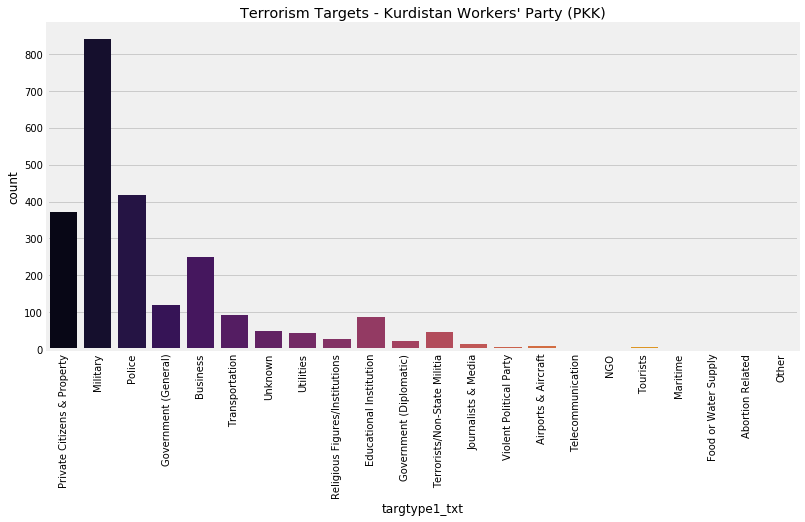

In [67]:
# GRAPH: Incident Targets - For Kurdistan Workers' Party (PKK) Terrorist Groups

plt.subplots(figsize=(12,6))
sns.countplot('targtype1_txt', data=filteredDf, palette ='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets - ' + terroristGroupString)
plt.show()